In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd

In [3]:
original=cv2.imread('img.bmp', cv2.IMREAD_COLOR_RGB)

In [4]:
original_path='img.bmp'

In [5]:
imgs_jpg=[f'img_jpg_{q}.jpg' for q in ['q5', 'q20', 'q50', 'q70', 'q90']]
imgs_jp2=[f'img_jp2_{q}.jp2' for q in ['q5', 'q20', 'q50', 'q70', 'q90']]

In [6]:
def get_size(image):
    height, width=image.shape[:]
    return height, width

In [7]:
def get_images(images):
    image_list=[]
    for img in images:
        image=cv2.imread(img, cv2.IMREAD_COLOR_RGB)
        image_list.append(image)
    return image_list

In [8]:
images_jpg=get_images(imgs_jpg)
images_jp2=get_images(imgs_jp2)

In [9]:
def compression_ratio(original_image, images):
    original_size=os.path.getsize(original_image)
    compression=[]
    for img in images:
        compressed_size=os.path.getsize(img)
        compression.append(compressed_size/original_size)
    return compression

In [10]:
compression_jpg=compression_ratio(original_path, imgs_jpg)
compression_jp2=compression_ratio(original_path, imgs_jp2)


In [11]:
'''
def get_nae(original_image, images):
    denominator = np.sum(np.abs(original_image.astype(np.float32)))
    nae_list=[]
    for img in images:
        numerator = np.sum(np.abs(original_image.astype(np.float32) - img.astype(np.float32)))
        nae=numerator/denominator
        nae_list.append(nae)
    return nae_list
'''

'\ndef get_nae(original_image, images):\n    denominator = np.sum(np.abs(original_image.astype(np.float32)))\n    nae_list=[]\n    for img in images:\n        numerator = np.sum(np.abs(original_image.astype(np.float32) - img.astype(np.float32)))\n        nae=numerator/denominator\n        nae_list.append(nae)\n    return nae_list\n'

In [12]:
def get_jk(original_image, images):
    height, width = original_image.shape[:2]
    jk_list = []
    for img in images:
        diff = np.sqrt(
            (original_image[:,:,0].astype(np.float32) - img[:,:,0].astype(np.float32))**2 +
            (original_image[:,:,1].astype(np.float32) - img[:,:,1].astype(np.float32))**2 +
            (original_image[:,:,2].astype(np.float32) - img[:,:,2].astype(np.float32))**2
        )
        jk = np.sum(diff) / (height * width)
        jk_list.append(jk)
    return jk_list

In [13]:
nae_jpg=get_jk(original, images_jpg)
nae_jp2=get_jk(original, images_jp2)

In [14]:
# [0.015, 0.039, 0.079, 0.11, 0.16] [38, 21, 12, 7, 4] [22, 11, 6, 3, 2]
data={
    "Compression ratio - jpg": compression_jpg,
    "Compression ratio - jp2": compression_jp2,
    "NAE - jpg": nae_jpg,
    "NAE - jp2": nae_jp2
}
df=pd.DataFrame(data)

In [15]:
df

,Compression ratio - jpg,Compression ratio - jp2,NAE - jpg,NAE - jp2
0,0.010980,0.049957,37.930885,21.201027
1,0.031157,0.199788,27.018974,7.894615
2,0.058472,0.499508,22.408016,1.911115
3,0.081605,0.685954,19.954996,0.000000
4,0.156059,0.685954,15.609573,0.000000


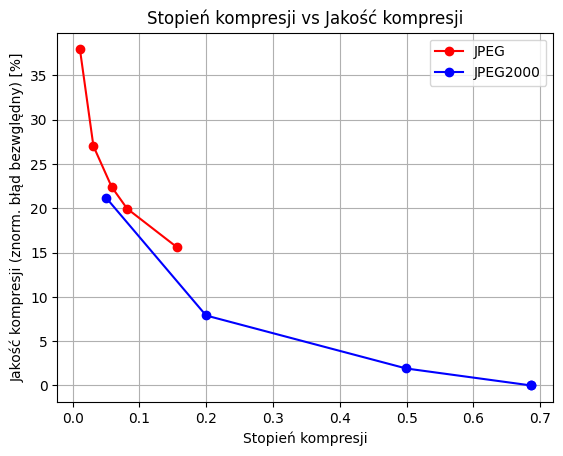

In [16]:
plt.plot(df["Compression ratio - jpg"], df["NAE - jpg"], marker='o', label='JPEG', color='red')
plt.plot(df["Compression ratio - jp2"], df["NAE - jp2"], marker='o', label='JPEG2000', color='blue')
plt.xlabel('Stopień kompresji')
plt.ylabel('Jakość kompresji (znorm. błąd bezwględny) [%]')
plt.title('Stopień kompresji vs Jakość kompresji')
plt.legend()
plt.grid(True)
plt.show()